In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

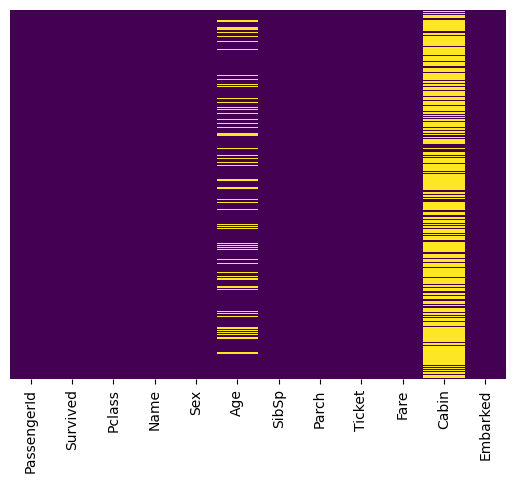

In [6]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [8]:
data.columns = data.columns.str.lower()

<Axes: xlabel='survived', ylabel='count'>

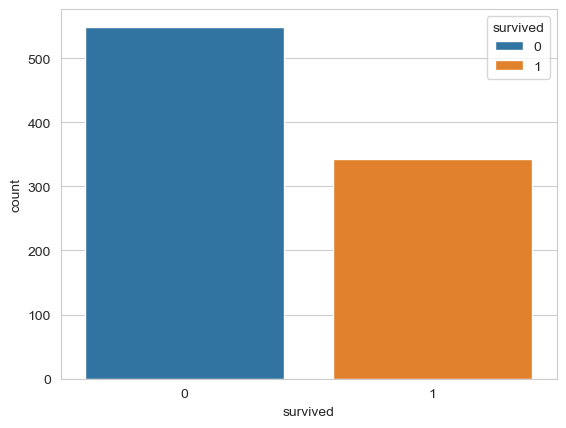

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='survived', data = data, hue = 'survived')

<Axes: xlabel='survived', ylabel='count'>

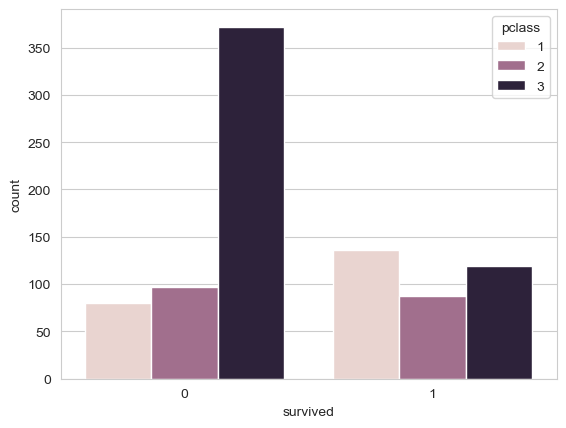

In [10]:
sns.countplot(data=data, x='survived',hue='pclass')

<Axes: xlabel='survived', ylabel='count'>

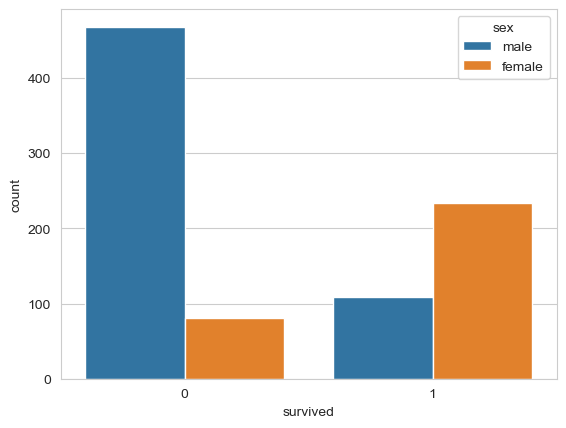

In [11]:
sns.countplot(data=data, x='survived', hue='sex')

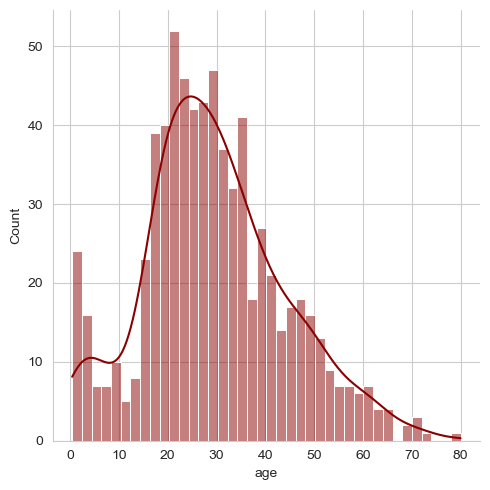

In [12]:
sns.displot(data['age'].dropna(), kde=True, color = 'darkred', bins=40)

<Axes: >

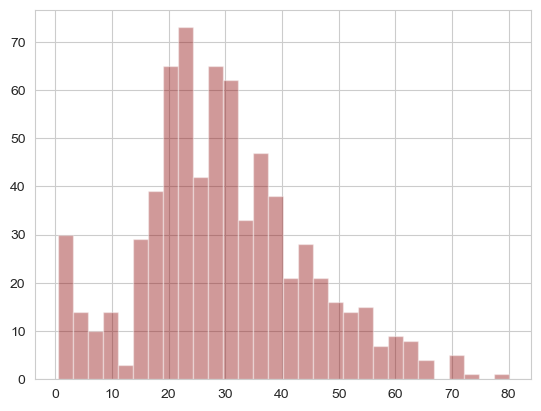

In [13]:
data['age'].hist(bins=30, color='darkred', alpha=0.4)

<Axes: xlabel='sibsp', ylabel='count'>

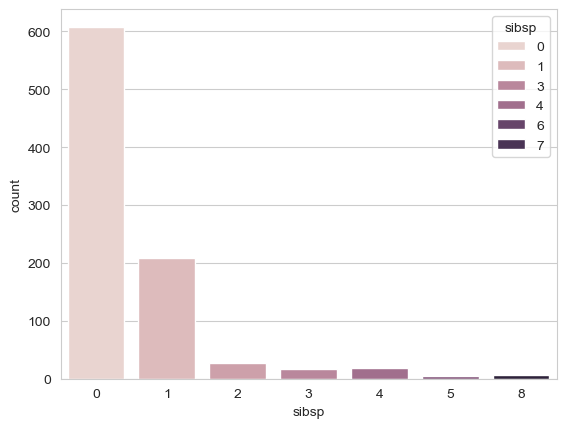

In [14]:
sns.countplot(data= data, x='sibsp', hue='sibsp')

<Axes: >

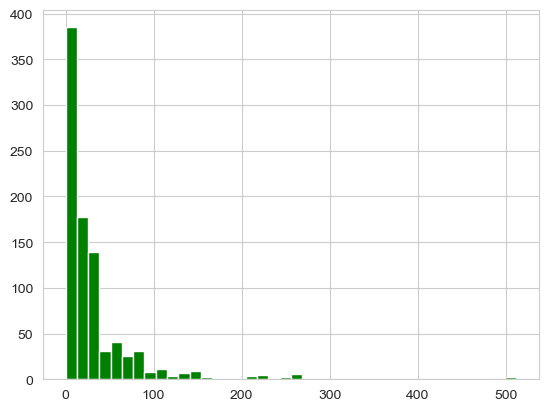

In [15]:
data['fare'].hist(color='green', bins=40)

<Axes: xlabel='parch', ylabel='count'>

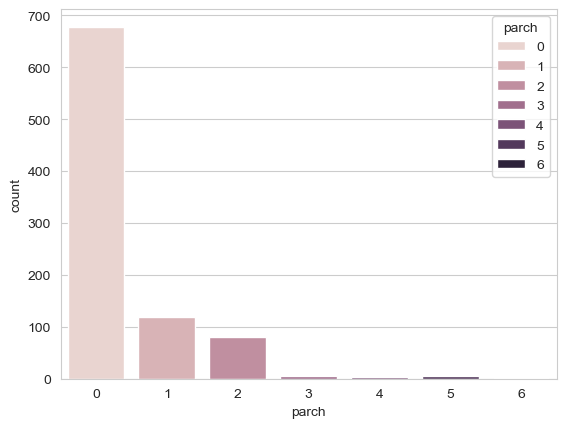

In [16]:
sns.countplot(data= data, x='parch', hue='parch')

<Axes: >

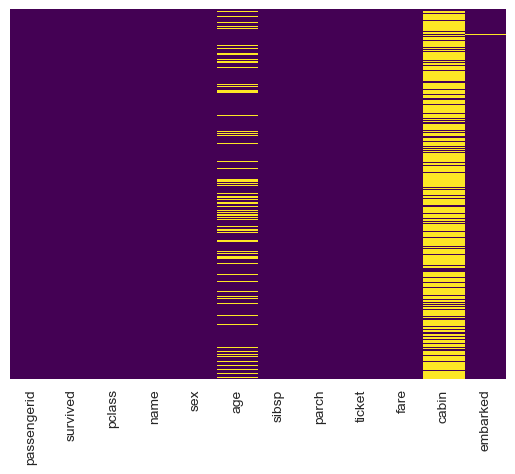

In [17]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='pclass', ylabel='age'>

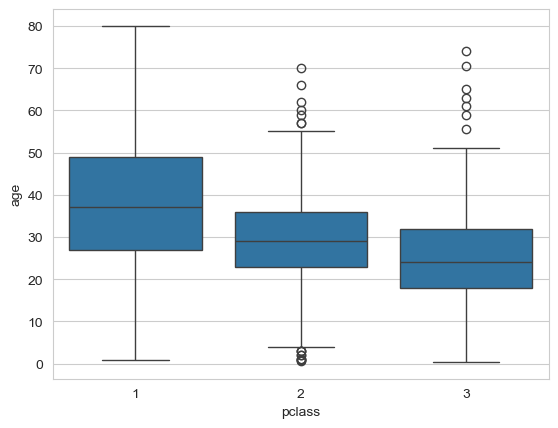

In [18]:
sns.boxplot(x='pclass', y='age', data=data)

In [19]:
def impute_age(col):
    age = col.iloc[0]
    pclass = col.iloc[1]

    if pd.isnull(age): 

        if pclass == 1: 
            return 37 
        elif pclass == 2: 
            return 29 
        else: 
            return 24 
    else: 
        return age 

In [20]:
data['age'] = data[['age','pclass']].apply(impute_age, axis=1)

<Axes: >

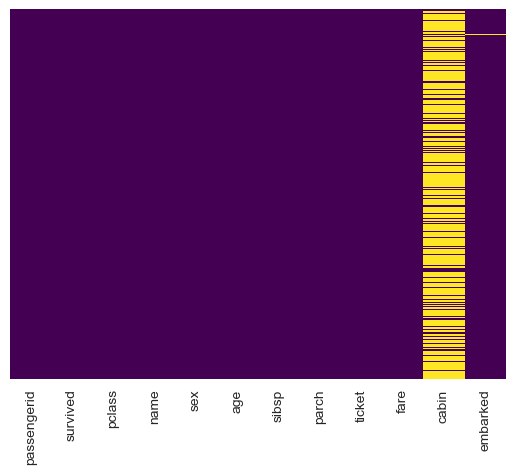

In [21]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
data=data.drop('cabin',axis=1)

In [23]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
embarked = pd.get_dummies(data['embarked'], drop_first=True).astype('int')
sex = pd.get_dummies(data['sex'], drop_first=True).astype('int')

In [26]:
data=data.drop(['sex','embarked','name','ticket'],axis=1)

In [27]:
data

,passengerid,survived,pclass,age,sibsp,parch,fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [28]:
data = pd.concat([data, sex, embarked], axis=1)

In [29]:
data.head()

,passengerid,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
X = data.drop(['survived'],axis=1)
y = data['survived']

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) 

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_sc, y_train)

LogisticRegression()

In [37]:
prediction = log.predict(X_test_sc)

In [38]:
prediction

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [41]:
conf = confusion_matrix(y_test, prediction)
conf

array([[144,  24],
       [ 28,  72]], dtype=int64)

In [42]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8059701492537313

In [44]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.75      0.72      0.73       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.81       268



In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [63]:
pred = rf.predict(X_test_sc)

In [65]:
conf = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)

accuracy, conf

(0.835820895522388,
 array([[147,  21],
        [ 23,  77]], dtype=int64))

In [66]:
X_train_sc.shape

(623, 9)

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout 

In [47]:
classifier = Sequential()

In [52]:
classifier.add(Dense(units = 9, activation='relu'))
classifier.add(Dense(units=  5, activation='relu'))
classifier.add(Dense(units=  5, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

In [53]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [55]:
model_hist = classifier.fit(X_train_sc, y_train, validation_split = 0.33, batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4980 - loss: 0.6924 - val_accuracy: 0.6456 - val_loss: 0.6894
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7341 - loss: 0.6866 - val_accuracy: 0.6408 - val_loss: 0.6845
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.6786 - val_accuracy: 0.6262 - val_loss: 0.6709
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6884 - loss: 0.6520 - val_accuracy: 0.6311 - val_loss: 0.6399
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.5907 - val_accuracy: 0.6748 - val_loss: 0.5880
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5692 - val_accuracy: 0.7476 - val_loss: 0.5321
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4950 - val_accuracy: 0.7718 - val_loss: 0.5003
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8207 - loss: 0.4609 - val_accuracy: 0.7767 - 

In [57]:
model_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

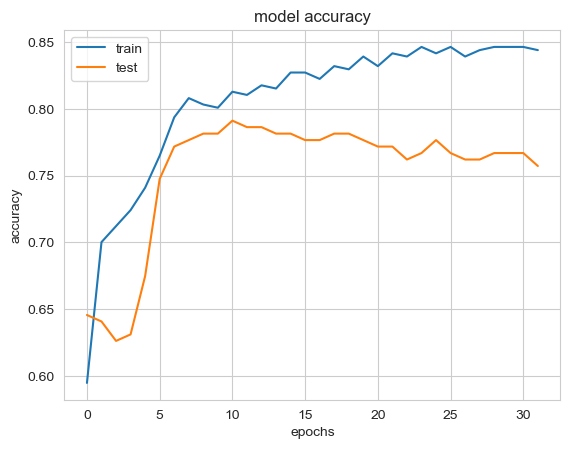

In [58]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

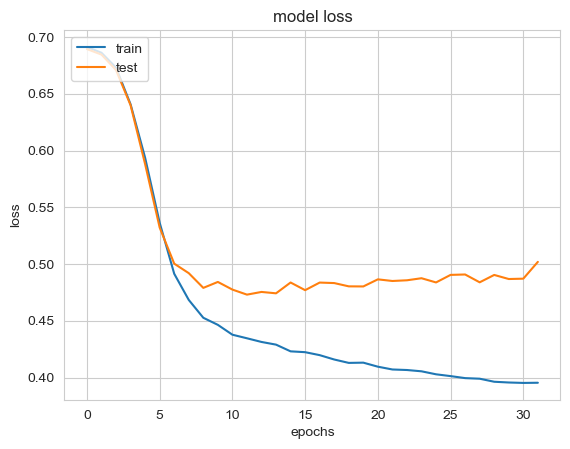

In [59]:
# Summarize history for loss
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()